##Machine Learning - Classification
---
### Nama: Nasywa Agiyan Nisa

### NIM: 24050122130073

### Mentor: Rusnanda Farhan



# **1. Perkenalan Dataset**


## Dataset Penyakit Jantung

Dataset ini berisi data klinis pasien yang digunakan untuk menganalisis dan memprediksi kemungkinan penyakit jantung berdasarkan berbagai faktor medis dan hasil pemeriksaan. Dataset ini berasal dari berbagai sumber medis, termasuk Cleveland, Hungarian, Swiss, dan Long Beach VA.

---

### 1. age (Usia)
- Usia pasien dalam tahun.
- Bertipe numerik.

### 2. sex (Jenis Kelamin)
- 1 = Laki-laki
- 0 = Perempuan
- Bertipe kategorik (biner).

### 3. cp (Tipe Nyeri Dada - Chest Pain Type)
- 1 = Angina tipikal
- 2 = Angina atipikal
- 3 = Nyeri non-anginal
- 4 = Asimptomatik
- Bertipe kategorik.

### 4. trestbps (Tekanan Darah Istirahat - Resting Blood Pressure)
- Tekanan darah pasien dalam mmHg saat masuk rumah sakit.
- Bertipe numerik.

### 5. chol (Kolesterol - Serum Cholesterol)
- Kadar kolesterol dalam darah (mg/dL).
- Bertipe numerik.

### 6. fbs (Gula Darah Puasa - Fasting Blood Sugar)
- 1 = Gula darah puasa > 120 mg/dL
- 0 = Normal
- Bertipe kategorik (biner).

### 7. restecg (Hasil Elektrokardiografi Istirahat - Resting ECG Results)
- 0 = Normal
- 1 = ST-T wave abnormal (inversi T wave, elevasi/depresi ST > 0.05 mV)
- 2 = Hipertrofi ventrikel kiri (LVH) menurut kriteria Estes
- Bertipe kategorik.

### 8. thalach (Denyut Jantung Maksimum - Maximum Heart Rate Achieved)
- Denyut jantung tertinggi yang dicapai pasien selama tes latihan.
- Bertipe numerik.

### 9. exang (Angina yang Dipicu Latihan - Exercise Induced Angina)
- 1 = Ya (terjadi angina saat latihan)
- 0 = Tidak
- Bertipe kategorik (biner).

### 10. oldpeak (Depresi ST - ST Depression Induced by Exercise)
- ST depression yang diinduksi oleh latihan dibandingkan dengan saat istirahat.
- Bertipe numerik.

### 11. slope (Kemiringan Segmen ST - Slope of the Peak Exercise ST Segment)
- 1 = Up-sloping
- 2 = Flat
- 3 = Down-sloping
- Bertipe kategorik.

### 12. ca (Jumlah Pembuluh Berwarna - Number of Major Vessels Colored by Fluoroscopy)
- 0–3 pembuluh darah utama yang diwarnai dengan fluoroskopi.
- Bertipe numerik.

### 13. thal (Thalassemia - Thalassemia Type)
- 3 = Normal
- 6 = Fixed defect
- 7 = Reversible defect
- Bertipe kategorik.

### 14. num (Diagnosis Penyakit Jantung - Heart Disease Diagnosis)
- 0 = Tidak ada penyakit jantung (>50% penyempitan diameter pembuluh darah utama)
- 1 = Ada penyakit jantung (>50% penyempitan diameter pembuluh darah utama)
- Bertipe kategorik.

# **2. Import Library**

Pada tahap ini, akan diimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data.

In [ ]:
# Manipulasi data
import pandas as pd  # Untuk manipulasi data dalam bentuk DataFrame
import numpy as np  # Untuk operasi numerik dan array

# Visualisasi
import matplotlib.pyplot as plt  # Untuk visualisasi data
import seaborn as sns  # Untuk visualisasi yang lebih menarik

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Normalisasi & standarisasi
from sklearn.preprocessing import LabelEncoder  # Encoding label kategorikal

# Split data
from sklearn.model_selection import train_test_split  # Membagi data latih dan uji

# Model ML
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Evaluasi Model
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score
)

# Over-sampling untuk data imbalance
from imblearn.over_sampling import SMOTE


# **3. Memuat Dataset**

Pada tahap ini, dataset perlu dimuat ke dalam notebook. Jika dataset dalam format CSV, bisa menggunakan pustaka pandas untuk membacanya. Perlu dipastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.


In [ ]:
df = pd.read_csv("/content/data.csv", sep=",")

# **4. Data Cleaning**  

1. **Memahami Struktur Data**  
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).  

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*).  
   - Tentukan langkah-langkah penanganan seperti imputasi atau penghapusan data yang hilang.  

3. **Analisis Duplikasi Data**  
   - Deteksi keberadaan data duplikat dalam dataset.  
   - Jika ditemukan duplikasi, lakukan penanganan seperti penghapusan entri yang redundan untuk memastikan kualitas data.  

4. **Analisis Outlier**  
   - Identifikasi outlier dalam variabel numerik menggunakan metode IQR (Interquartile Range)  
   - Tentukan apakah outlier perlu ditangani, misalnya dengan transformasi data atau penghapusan jika diperlukan.  

### Menilai Data

In [ ]:
# Melihat ringkasan informasi df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


 Interpretasi:

1. Dataset ini berbentuk DataFrame dari pustaka pandas dengan 294 baris dan 14 kolom.

2. Indeks data menggunakan RangeIndex dari 0 hingga 293.  

3. Kolom-kolom yang ada:  
   - Terdapat 14 kolom dengan berbagai jenis data.  
   - 5 kolom bertipe numerik (integer atau float).  
   - 9 kolom bertipe object

4. Dari ouptut di atas terlihat bahwa tidak ada missing values karena memiliki 294 kolom, tetapi perlu dilakukan pengecekan lebih lanjut

In [ ]:
# Melihat ringkasan parameter statistik
df.describe(include="all")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,294.000000,294.000000,294.000000,294,294,294,294,294,294,294.000000,294,294,294,294.000000
unique,NaN,NaN,NaN,32,154,3,4,72,3,NaN,4,2,4,NaN
top,NaN,NaN,NaN,120,?,0,0,150,0,NaN,?,?,?,NaN
freq,NaN,NaN,NaN,65,23,266,235,29,204,NaN,190,291,266,NaN
mean,47.826531,0.724490,2.982993,NaN,NaN,NaN,NaN,NaN,NaN,0.586054,NaN,NaN,NaN,0.360544
std,7.811812,0.447533,0.965117,NaN,NaN,NaN,NaN,NaN,NaN,0.908648,NaN,NaN,NaN,0.480977
min,28.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,42.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
50%,49.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
75%,54.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000


Interpretasi:
- count: jumlah total nilai yang tidak null dalam kolom  
- mean: rata-rata dari semua nilai dalam kolom  
- std: standar deviasi dalam kolom  
- max: nilai maksimum dalam kolom  
- 25%: kuartil pertama setelah nilai diurutkan dalam urutan naik  
- 50%: median atau kuartil kedua  
- 75%: kuartil ketiga  

In [ ]:
# Menampilkan beberapa baris df
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


Interpretasi:

Terlihat bahwa terdapat kolom yang memiliki nilai "?" sehingga perlu dilakukan penanganan dengan mengubahnya menjadi "NaN" agar dapat terdeteksi sebagai missing values dan ditangani dengan tepat.

### Memeriksa duplikasi data

In [ ]:
print(df.duplicated().sum())

1


In [ ]:
# Menghapus duplikasi data
df = df.drop_duplicates()

Interpretasi:

Ditemukan data duplikat yang perlu ditangani dengan menghapus salah satu entri yang terduplikasi.

### Memeriksa Unique Values atau Categories pada tiap Kolom

In [ ]:
# Periksa jumlah nilai unik atau kategori di setiap kolom.
df.nunique()

,0
age,38
sex,2
cp,4
trestbps,32
chol,154
fbs,3
restecg,4
thalach,72
exang,3
oldpeak,10


Interpretasi:

Di atas adalah jumlah entri unik dalam setiap kolom. Terdapat 38 nilai unik untuk age, 2 untuk sex, dan seterusnya.

### Memeriksa missing values

In [ ]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


<Axes: >

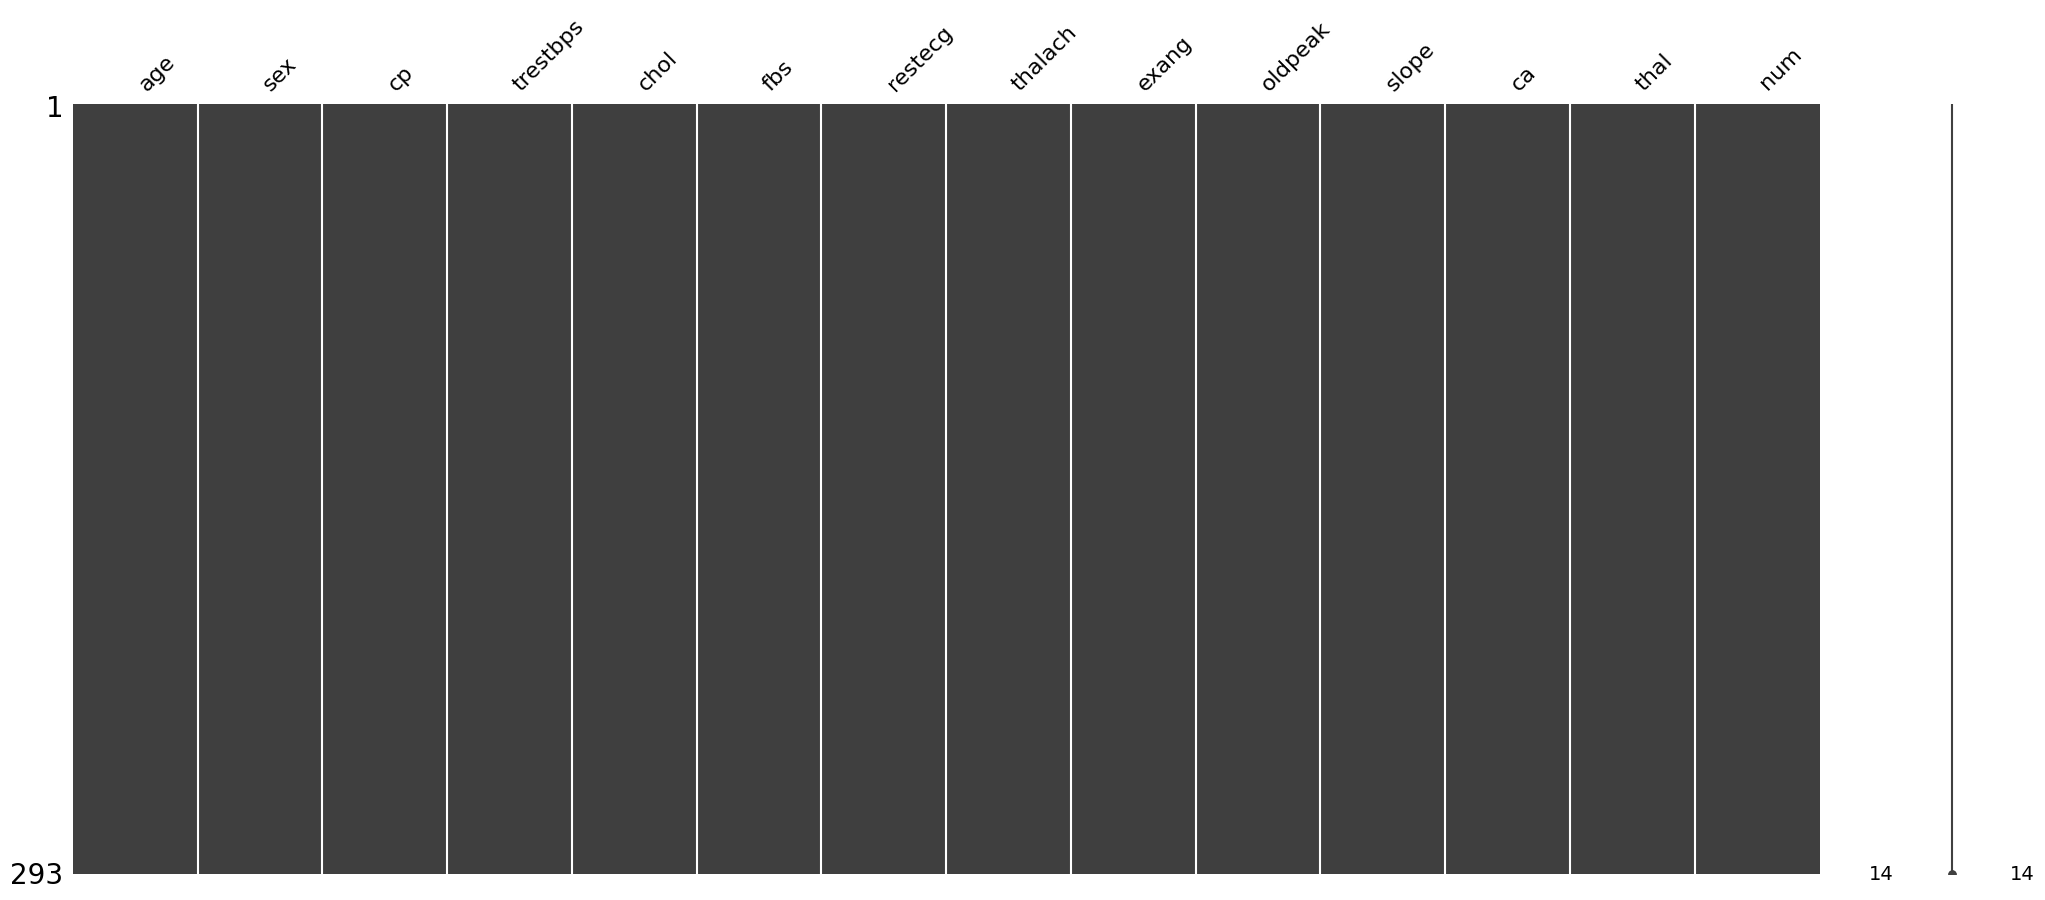

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
# Ubah '?' menjadi NaN langsung di df
df.replace('?', np.nan, inplace=True)

# Cek jumlah missing values setelah konversi
print(df.isna().sum())


age             0
sex             0
cp              0
trestbps        1
chol           22
fbs             8
restecg         1
thalach         1
exang           1
oldpeak         0
slope         189
ca            290
thal          265
num             0
dtype: int64


In [ ]:
# Melihat persentase missing values
df.isna().mean()*100

,0
age,0.000000
sex,0.000000
cp,0.000000
trestbps,0.341297
chol,7.508532
fbs,2.730375
restecg,0.341297
thalach,0.341297
exang,0.341297
oldpeak,0.000000


### Penanganan Missing Values  

Berdasarkan hasil analisis, ditemukan missing values yang akan ditangani dengan metode berikut:  

- Jika jumlah missing values pada data numerik **kurang dari 75%**, maka akan diimputasi menggunakan **mean**.  
- Jika jumlah missing values pada data numerik **lebih dari 75%**, maka kolom tersebut akan **dihapus**.  
- Missing values pada data kategorik akan diimputasi menggunakan **modus**.

In [ ]:
#Hitung persentase missing values
missing_percent = df.isnull().mean() * 100

#Hapus kolom yang memiliki lebih dari 75% missing values
cols_to_drop = missing_percent[missing_percent > 75].index
df = df.drop(columns=cols_to_drop)

#Isi kolom kategori dengan modus (mode)
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]) if x.isnull().sum() > 0 else x)

#Isi kolom numerik yang memiliki missing value < 75% dengan mean
num_cols = df.select_dtypes(include=['number']).columns
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())



### Mengubah Tipe Data

In [ ]:
# Mengonversi kolom menjadi integer
df[["trestbps", "chol", "thalach"]] = df[["trestbps", "chol", "thalach"]].astype(float)

### Memeriksa Outlier

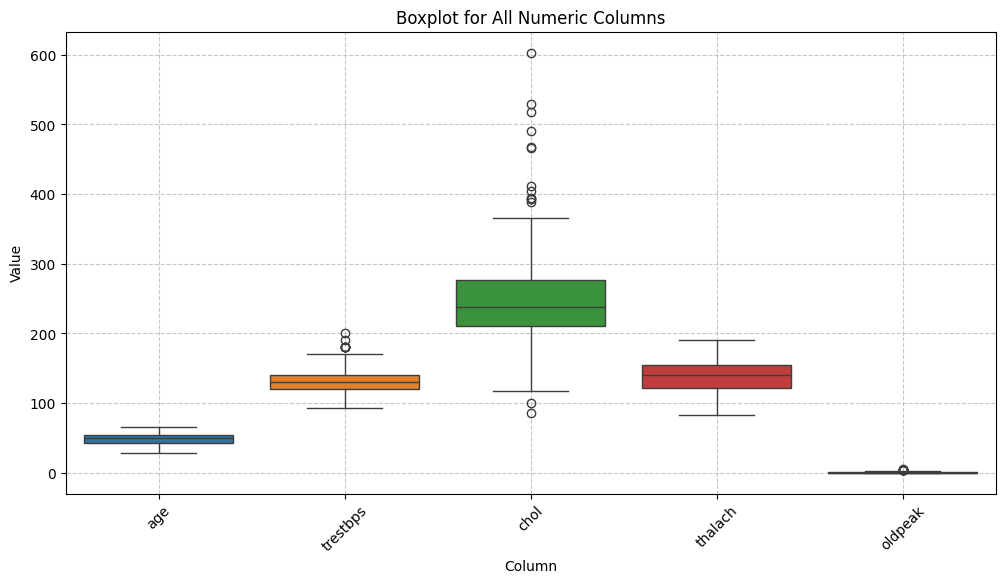

In [ ]:
# Pilih hanya kolom numerik
num_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Set ukuran figure
plt.figure(figsize=(12, 6))

# Buat boxplot untuk semua kolom numerik dengan seaborn untuk tampilan lebih baik
sns.boxplot(data=df[num_cols], orient="v")

# Rotasi label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45)
plt.title("Boxplot for All Numeric Columns")
plt.ylabel("Value")
plt.xlabel("Column")
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()


In [ ]:
# Memilih kolom numerik
num_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Mendeteksi outlier dengan metode IQR
def detect_outliers(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Mendeteksi outlier dalam dataset
outliers_detected_df = detect_outliers(df, num_cols)

# Menghitung jumlah outlier per kolom
outlier_counts_df = {col: len(outliers_detected_df[col]) for col in outliers_detected_df}

# Menampilkan jumlah outlier per kolom
print("Jumlah outlier per kolom:", outlier_counts_df)

# Pastikan hanya kolom numerik yang dianalisis
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce').copy()


Jumlah outlier per kolom: {'age': 0, 'trestbps': 8, 'chol': 14, 'thalach': 0, 'oldpeak': 11}


In [ ]:
# Fungsi untuk menghapus outlier langsung dalam df
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Hapus baris yang memiliki nilai outlier
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df= remove_outliers(df, num_cols)


### Menghapus spasi di awal dan akhir nama kolom

In [ ]:
df.columns = df.columns.str.strip()

### Membuat dataframe yang sudah dibersihkan

In [ ]:
df_cleaned= df.copy()

Interpretasi:

Dari output di atas dapat dilihat bahwa terdapat outlier pada beberapa kolom. Maka perlu dilakukan penanganan dengan menghapus atau drop outlier.

# **5. Klasifikasi**

### Data Spliting

In [ ]:
# Pemisahan Fitur dan Target dalam DataFrame
X = df_cleaned.drop('num', axis=1)
y = df_cleaned['num']

In [ ]:
# Menampilkan lima baris pertama dari DataFrame X.
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,28,1,2,130.0,132.0,0,2,185.0,0,0.0,2
1,29,1,2,120.0,243.0,0,0,160.0,0,0.0,2
2,29,1,2,140.0,230.0,0,0,170.0,0,0.0,2
3,30,0,1,170.0,237.0,0,1,170.0,0,0.0,2
4,31,0,2,100.0,219.0,0,1,150.0,0,0.0,2


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 261 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       261 non-null    int64  
 1   sex       261 non-null    int64  
 2   cp        261 non-null    int64  
 3   trestbps  261 non-null    float64
 4   chol      261 non-null    float64
 5   fbs       261 non-null    object 
 6   restecg   261 non-null    object 
 7   thalach   261 non-null    float64
 8   exang     261 non-null    object 
 9   oldpeak   261 non-null    float64
 10  slope     261 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 24.5+ KB


### Label Encoder

In [ ]:
# Menyeleksi Fitur Kategorikal
category_features = X.select_dtypes(include=['object']).columns

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
X = pd.DataFrame(X)

for col in category_features:
    X[col] = label_encoder.fit_transform(X[col])

# Menampilkan hasil
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,28,1,2,130.0,132.0,0,2,185.0,0,0.0,1
1,29,1,2,120.0,243.0,0,0,160.0,0,0.0,1
2,29,1,2,140.0,230.0,0,0,170.0,0,0.0,1
3,30,0,1,170.0,237.0,0,1,170.0,0,0.0,1
4,31,0,2,100.0,219.0,0,1,150.0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
287,50,1,4,140.0,341.0,0,1,125.0,1,2.5,1
288,52,1,4,140.0,266.0,0,0,134.0,1,2.0,1
289,52,1,4,160.0,331.0,0,0,94.0,1,2.5,1
290,54,0,3,130.0,294.0,0,1,100.0,1,0.0,1


### Standarisasi Data

In [ ]:
# Standarisasi dengan Standard Scaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,-2.488735,0.629064,-0.969382,-0.029375,-2.311814,-0.272166,3.985614,1.906653,-0.605386,-0.641095,0.192303
1,-2.361942,0.629064,-0.969382,-0.684661,0.059758,-0.272166,-0.459879,0.843418,-0.605386,-0.641095,0.192303
2,-2.361942,0.629064,-0.969382,0.625911,-0.217994,-0.272166,-0.459879,1.268712,-0.605386,-0.641095,0.192303
3,-2.235149,-1.589663,-2.010571,2.591769,-0.068435,-0.272166,1.762868,1.268712,-0.605386,-0.641095,0.192303
4,-2.108356,-1.589663,-0.969382,-1.995232,-0.453014,-0.272166,1.762868,0.418124,-0.605386,-0.641095,0.192303


### Pembagian Data Menjadi Training dan Testing Set

In [ ]:
# 20% data digunakan untuk pengujian, 80% untuk pelatihan.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((208, 11), (53, 11), (208,), (53,))

### Proposi Target

In [ ]:
y_train.value_counts()

,count
num,
0,139
1,69


### Penanganan Imbalance Data Menggunakan SMOTE

In [ ]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
y_train_smote.value_counts()

,count
num,
1,139
0,139


## Membangun Model Klasifikasi

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

### KNN

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_smote, y_train_smote)


KNeighborsClassifier()

### Desicion Tree

In [ ]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_smote, y_train_smote)


DecisionTreeClassifier()

### Random Forest

In [ ]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_smote, y_train_smote)


RandomForestClassifier()

### Gaussian Naïve Bayes

In [ ]:
gaussian_nb_model = GaussianNB()
gaussian_nb_model.fit(X_train_smote, y_train_smote)


GaussianNB()

### Support Vector Machine (SVM)


In [ ]:
svm_model = SVC()
svm_model.fit(X_train_smote, y_train_smote)


SVC()

## Evaluasi Model

In [ ]:
# Fungsi untuk mengukur kinerja model menggunakan data pelatihan
def evaluate_model_train(model, X_train_smote, y_train_smote):
    y_pred = model.predict(X_train_smote)  # Memprediksi label berdasarkan data pelatihan
    cm = confusion_matrix(y_train_smote, y_pred)  # Menghitung confusion matrix

    # Menyusun hasil evaluasi dalam bentuk dictionary
    results = {
        'Confusion Matrix': cm,  # Matriks kesalahan untuk melihat distribusi prediksi
        'Accuracy': accuracy_score(y_train_smote, y_pred),  # Mengukur tingkat akurasi prediksi
        'Precision': precision_score(y_train_smote, y_pred, average='macro'),  # Precision rata-rata
        'Recall': recall_score(y_train_smote, y_pred, average='macro'),  # Recall rata-rata
        'F1-Score': f1_score(y_train_smote, y_pred, average='macro')  # F1-score rata-rata
    }
    return results  # Mengembalikan hasil evaluasi model


In [ ]:
# Evaluasi model dan penyimpanan hasil
# Melakukan evaluasi pada setiap model yang telah dilatih dan menyimpan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model_train(knn_model, X_train_smote, y_train_smote),
    'Decision Tree (DT)': evaluate_model_train(decision_tree_model, X_train_smote, y_train_smote),
    'Random Forest (RF)': evaluate_model_train(random_forest_model, X_train_smote, y_train_smote),
    'Support Vector Machine (SVM)': evaluate_model_train(svm_model, X_train_smote, y_train_smote),
    'Naive Bayes (NB)': evaluate_model_train(gaussian_nb_model, X_train_smote, y_train_smote)
}

In [ ]:
# Membuat DataFrame ringkasan hasil evaluasi
# Membuat DataFrame untuk menyusun hasil evaluasi dalam bentuk tabel
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Mengisi DataFrame dengan hasil evaluasi model
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,  # Nama model
        'Accuracy': metrics['Accuracy'],  # Nilai akurasi
        'Precision': metrics['Precision'],  # Nilai precision
        'Recall': metrics['Recall'],  # Nilai recall
        'F1-Score': metrics['F1-Score']  # Nilai F1-score
    })


In [ ]:
# Mengubah list of dictionary menjadi DataFrame
summary_df = pd.DataFrame(rows)

In [ ]:
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.899281   0.902279  0.899281  0.899093
1            Decision Tree (DT)  1.000000   1.000000  1.000000  1.000000
2            Random Forest (RF)  1.000000   1.000000  1.000000  1.000000
3  Support Vector Machine (SVM)  0.906475   0.907826  0.906475  0.906397
4              Naive Bayes (NB)  0.809353   0.809753  0.809353  0.809291


## Confusion Matrix

### Confusion Matrix untuk Model K-Nearest Neighbors (KNN)

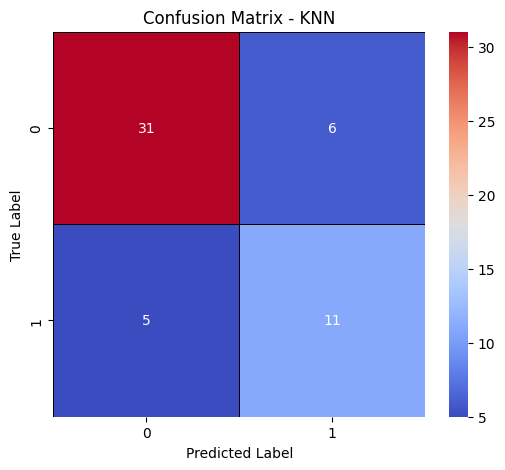

In [ ]:
# Melakukan prediksi pada data uji menggunakan model K-Nearest Neighbors (KNN)
y_pred = knn_model.predict(X_test)

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat plot confusion matrix dengan seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5, linecolor='black')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - KNN')

# Menampilkan plot
plt.show()


### Confusion Matrix untuk Model Decision Tree

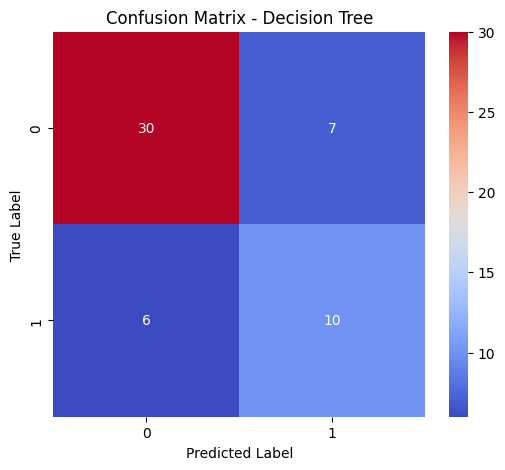

In [ ]:
# Melakukan prediksi menggunakan Decision Tree
y_pred = decision_tree_model.predict(X_test)

# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi menggunakan Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm", xticklabels=decision_tree_model.classes_, yticklabels=decision_tree_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


### Confusion Matrix untuk Model Random Forest

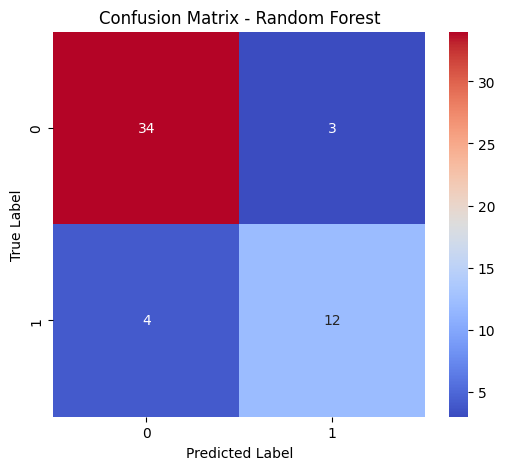

In [ ]:
# Melakukan prediksi menggunakan Random Forest
y_pred = random_forest_model.predict(X_test)

# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi menggunakan Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm", xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))

# Menambahkan label
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')

plt.show()


### Confusion Matrix untuk Model SVM

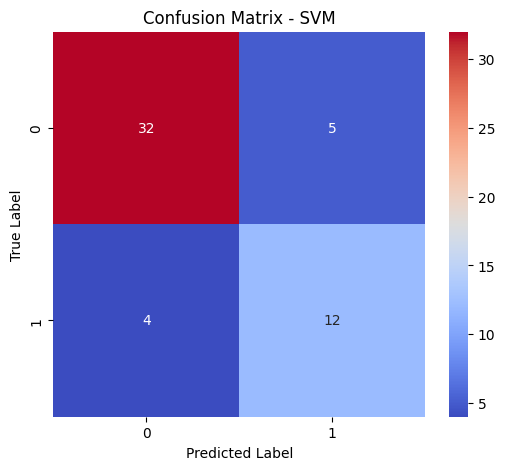

In [ ]:
# Melakukan prediksi menggunakan SVM
y_pred = svm_model.predict(X_test)

# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi menggunakan Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm", xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))

# Menambahkan label dan judul
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM')

plt.show()


### Confusion Matrix untuk Model Naive Bayes

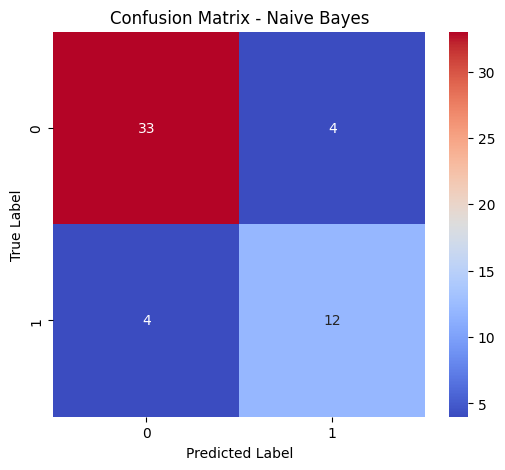

In [ ]:
# Melakukan prediksi menggunakan Naive Bayes
y_pred = gaussian_nb_model.predict(X_test)

# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi menggunakan Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm", xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))

# Menambahkan label dan judul
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Naive Bayes')

plt.show()


### **Kesimpulan**

Berdasarkan hasil evaluasi terhadap lima algoritma klasifikasi, performa masing-masing model adalah sebagai berikut:

1. **Decision Tree (DT)** dan **Random Forest (RF)**  
   - Kedua model ini memperoleh skor sempurna pada seluruh metrik evaluasi:  
     **Accuracy**, **Precision**, **Recall**, dan **F1-Score** sebesar **1.000000**.  
   - Ini menunjukkan bahwa model mampu mengklasifikasikan data tanpa kesalahan sama sekali. Namun, performa sempurna seperti ini bisa menjadi indikasi adanya **overfitting**.

2. **Support Vector Machine (SVM)**  
   - Akurasi: **0.906475**  
   - Precision: **0.907826**  
   - Recall: **0.906475**  
   - F1-Score: **0.906397**  
   - SVM menunjukkan performa yang kuat dan seimbang. Nilai precision dan recall yang tinggi menunjukkan bahwa model mampu mengidentifikasi kelas dengan baik dan konsisten.

3. **K-Nearest Neighbors (KNN)**  
   - Akurasi: **0.899281**  
   - Precision: **0.902279**  
   - Recall: **0.899281**  
   - F1-Score: **0.899093**  
   - KNN memiliki performa yang kompetitif dengan SVM. Nilai metriknya yang mendekati SVM menandakan model ini juga cukup andal dalam klasifikasi, meskipun sedikit lebih rendah.

4. **Naive Bayes (NB)**  
   - Akurasi: **0.809353**  
   - Precision: **0.809753**  
   - Recall: **0.809353**  
   - F1-Score: **0.809291**  
   - NB menunjukkan performa paling rendah di antara semua model. Nilai metrik yang konsisten namun lebih rendah menandakan bahwa model ini lebih sederhana dan kemungkinan kurang mampu menangkap pola kompleks dalam data dibandingkan model yang lain.

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Mount Google Drive to access it

import pickle

# Now you can save the model to a file within your Drive
pickle.dump(gaussian_nb_model, open("/content/drive/MyDrive/gaussian_nb_model.pkl", "wb"))

MessageError: Error: credential propagation was unsuccessful